# Latihan Mandiri Damin Modul 6
**Nama**: Elok Fiola     
**NIM** : 122450051     
**Kelas** : RC

(3, 3, 3, 2, 2, 2, 1)    
(0,1,3,3)

Urutan derajat: [3, 3, 3, 2, 2, 2, 1]
Distribusi frekuensi derajat (N_k): [0, 1, 3, 3]
Distribusi derajat (f(k)): [0.0, 0.14285714285714285, 0.42857142857142855, 0.42857142857142855]


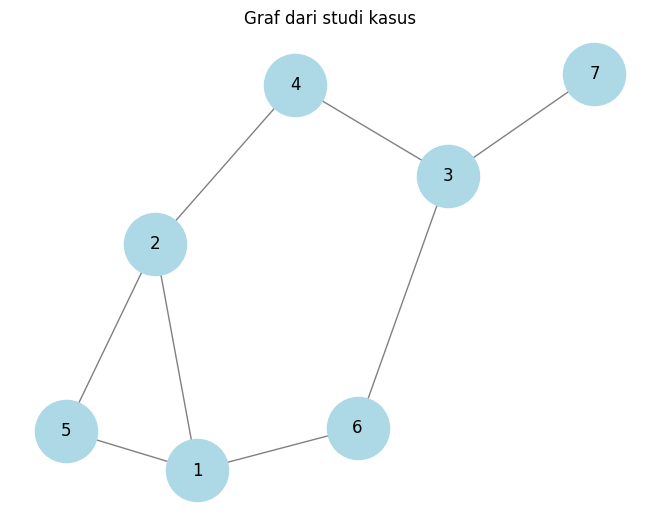

In [ ]:
#Import library
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Membuat graf
G = nx.Graph()
# Menambahkan simpul dan sisi (edges)
edges = [(1, 2), (1, 5), (1, 6), (2, 5), (2,4), (3,4), (6,3), (3,7)]
G.add_edges_from(edges)
# Menghitung urutan derajat (degree sequence)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print("Urutan derajat:", degree_sequence)
# Menghitung distribusi frekuensi derajat
degree_count = Counter(degree_sequence)
max_degree = max(degree_sequence)
N_k = [degree_count.get(i, 0) for i in range(max_degree + 1)]
print("Distribusi frekuensi derajat (N_k):", N_k)
# Menghitung distribusi derajat (f(k))
n = len(G.nodes())
f_k = [N_k[i] / n for i in range(max_degree + 1)]
print("Distribusi derajat (f(k)):", f_k) #menunjukkan proporsi masing-masing derajat. Misalnya, 14.29% simpul memiliki derajat 1, 42.86% memiliki derajat 3, dan 42.86% memiliki derajat 4
# Menggambar graf
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000,
        font_size=12, font_color='black', edge_color='gray')
plt.title("Graf dari studi kasus")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
# Load and shuffle iris data
data = load_iris()
iris_features, iris_target = shuffle(data.data, data.target, random_state=10000)
# Use all 150 samples
iris_features = iris_features [:150]

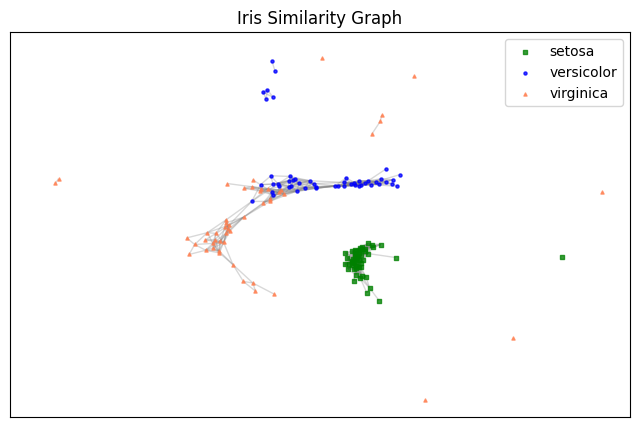

In [ ]:
# Define sigma and calculate similarity matrix using the given formula
sigma = 1 / np.sqrt(2)
similarity_matrix = np.exp(-np.square (np.linalg.norm(iris_features[:, np.newaxis] -
                                                      iris_features, axis=2)) / (2 * sigma**2))
# Calculate mean and standard deviation of similarities
mean_similarity = np.mean(similarity_matrix) #mean
std_similarity = np.std(similarity_matrix) #standard deviation of similarities
# Set threshold to mean + 2 std deviation
threshold = mean_similarity + 2 * std_similarity
# Create a graph using NetworkX
graph = nx.Graph()
# Add nodes to the graph
for i in range(len(iris_features)):
  graph.add_node(i, label=data.target_names[iris_target[i]])
  # Add edges based on similarity threshold
for i in range(len(iris_features)):
   for j in range(i + 1, len(iris_features)):
    if similarity_matrix[i, j] >= threshold:
      graph.add_edge(i, j, weight=similarity_matrix[i, j])
# Draw the graph with different symbols for each species
pos = nx.spring_layout(graph, seed=150) # Position nodes using spring layout
plt.figure(figsize=(8, 5))

# Define markers and colors for each species
markers = {'setosa': 's', 'versicolor': 'o', 'virginica': '^'}
colors = {'setosa': 'green', 'versicolor': 'blue', 'virginica': 'coral'}
node_shapes = {species: [] for species in markers.keys()}
# Assign nodes to their respective shapes and colors based on species
for i in range(len(iris_features)):
  species = data.target_names[iris_target[i]]
  node_shapes[species].append(i)
# Draw nodes with different shapes and transparent colors for each species
for species, nodes in node_shapes.items():
  nx.draw_networkx_nodes (graph, pos, nodelist=nodes, node_shape=markers [species],
                          node_color=colors [species], alpha=0.77, node_size=5, label= species)
# Draw edges and labels
nx.draw_networkx_edges(graph, pos, edge_color= 'grey', alpha=0.3)
nx.draw_networkx_labels (graph, pos, labels={i: '' for i in range(len(iris_features))},font_size=10)
plt.legend(scatterpoints=1)
plt.title("Iris Similarity Graph")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# 1. Load the Iris dataset and prepare it as a DataFrame
iris = load_iris()
data = pd.DataFrame (data=iris.data, columns=iris.feature_names)

In [ ]:
# 2. Create Graph using Euclidean distance
def create_graph (data):
  G = nx.Graph()
  for i in range(len(data)):
    for j in range(i + 1, len(data)):
      distance = np.linalg.norm(data.iloc[i]-data.iloc[j])
      G.add_edge(i, j, weight=distance)
  return G

# Create the graph from the data 18G create graph (data)
# 3. Compute Eccentricity
eccentricity = nx.eccentricity (G)
print("Eccentricity of each node:", eccentricity)

#4. Compute Radius
radius = min(eccentricity.values())
print("Radius of the graph:", radius)

# 5. Compute Diameter
diameter = nx.diameter(G)
print("Diameter of the graph:", diameter)

Eccentricity of each node: {1: 3, 2: 3, 5: 4, 6: 2, 4: 2, 3: 3, 7: 4}
Radius of the graph: 2
Diameter of the graph: 4


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

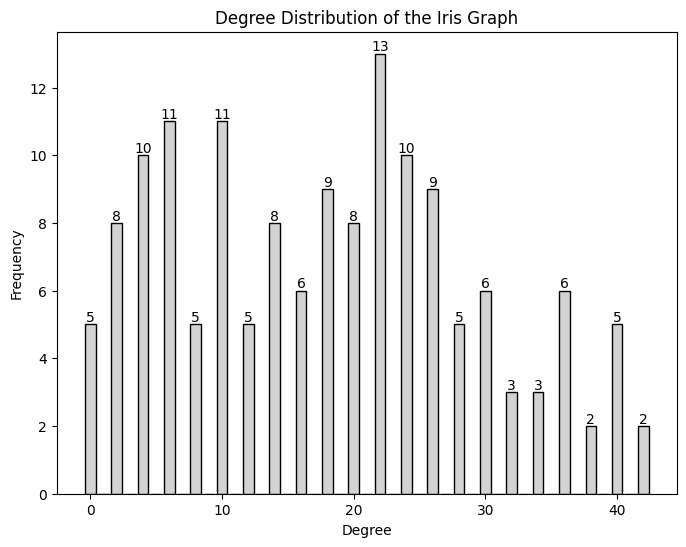

In [ ]:
# 3. Compute pairwise similarities using Euclidean distance
def pairwise_similarity(X):
  n_samples = X.shape[0]
  similarity_matrix = np.zeros((n_samples, n_samples))
  for i in range(n_samples):
    for j in range(i+1, n_samples):
      distance = np.linalg.norm(X[i] - X[j])
      similarity_matrix[i, j] = np.exp(-distance) # Similarity function
      similarity_matrix[j, i] = similarity_matrix [i, j] # Ensure symmetry
  return similarity_matrix

# Compute similarity matrix
similarity_matrix = pairwise_similarity(X_scaled)
#4. Compute mean and standard deviation of similarities
mean_similarity = np.mean(similarity_matrix)
std_similarity = np.std(similarity_matrix)
threshold = mean_similarity + 2 * std_similarity

# 5. Create binary adjacency matrix based on the threshold
adjacency_matrix = (similarity_matrix > threshold).astype(int)
# Ensure the adjacency matrix is symmetric
adjacency_matrix = np.maximum(adjacency_matrix, adjacency_matrix.T)

# 6. Build the graph from the adjacency matrix
G = nx.DiGraph (adjacency_matrix)

# 7. Calculate the degree of each node
degrees = [G.degree(n) for n in G.nodes()]

# 8. Visualize the degree distribution using a histogram
plt.figure(figsize=(8,6))
plt.hist(degrees, bins=range (min (degrees), max(degrees) + 2),
         align='left', rwidth=0.8, color='lightgrey', edgecolor='black')
plt.title("Degree Distribution of the Iris Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
# Add frequency numbers on top of each bar
for i, count in enumerate (np.bincount(degrees)):
  if count > 0:
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()